In [34]:
# parameters

gamma = 80
a = 1
b = 1
c = 1
d = 5
h = 0.4
r = 10
Kda = 0.01
Kdb = 0.01

# functions
    
def p(u,v):
    return v/(Kdb*(1 + u/Kda) + v)

def f(u,v):
    return 1 - a*(p(u,v))**r/(h**r + (p(u,v))**r) - u

def g(u,v):
    return 1 - b*(p(u,v))**r/(h**r + (p(u,v))**r) - c*v

In [35]:
# boundary conditions

bcs = [[{"derivative": 0}, {"derivative": 0}], "periodic"]

In [36]:
# setting up the PDE solver 

from pde import PDEBase

class ReactionDiffusionPDE(PDEBase):

    def __init__(self, bc = bcs):
        self.bc = bc # boundary conditions
        self.d = d # relative diffusivity
        self.gamma = gamma
        
    def evolution_rate(self, state, t=0):
        u, v = state
        u_t = u.laplace(bc=self.bc) + self.gamma*f(u,v) # PDE
        v_t = self.d*v.laplace(bc=self.bc) + self.gamma*g(u,v)
        
        return FieldCollection([u_t, v_t])

In [37]:
# solving for the steady state (f = g = 0)

from scipy.optimize import newton

# Define the system of equations
def equations(x):
    u, v = x
    eq1 = f(u, v)
    eq2 = g(u, v)
    return [eq1, eq2]

# Initial guess
x0 = [0.5, 0.5]

# Solve the system of equations using Newton-Raphson method
u0, v0 = newton(equations, x0)

# print the solution
print(f"The steady state is (u0, v0) = {(u0, v0)}")

The steady state is (u0, v0) = (0.13408416850366797, 0.13408416850366797)


In [42]:
from pde import CartesianGrid, ScalarField
import numpy as np

# Define the domain
grid = CartesianGrid([[0,100], [0,20]], [100,20], periodic = [False, True])

In [43]:
from pde import FieldCollection

# Initial state Case-I

# Define the magnitude of noise around the steady state
noise_u = 0.10*u0
noise_v = 0.10*v0

# define an initial state on the domain with values centered at the steady state with some noise around it
U1 = ScalarField.random_normal(grid, noise_u) + u0
V1 = ScalarField.random_normal(grid, noise_v) + v0

state1 = FieldCollection([U1, V1])


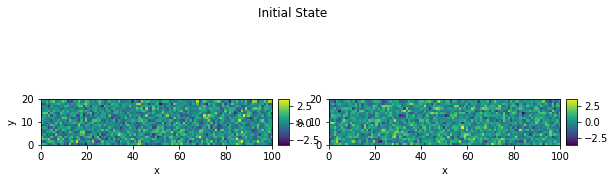

  0%|          | 0/1.0 [00:00<?, ?it/s]

Output()

Spent more time on handling trackers (2.81) than on the actual simulation (1.61)


In [45]:
from pde import PlotTracker

eq = ReactionDiffusionPDE() # solving the PDE

state1.plot(title = "Initial State") # plotting the initial state

tracker = PlotTracker(interval=0.1)
result1 = eq.solve(state1, t_range=1, dt=0.001, tracker=["progress", tracker]) # plotting the time evolution of the system

# result = eq.solve(state1, t_range=2, dt=0.001)
# print(result.data)

# print(state1.data)

In [46]:
# Initial state Case-II

U2 = ScalarField(grid)
U2.data[0,0] = u0

V2 = ScalarField(grid)
V2.data[0,0] = v0

state2 = FieldCollection([U2,V2])

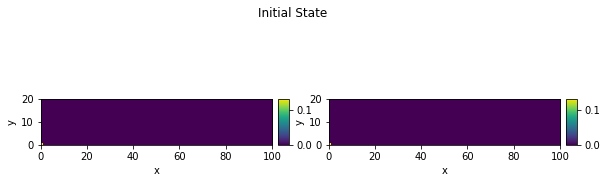

  0%|          | 0/5.0 [00:00<?, ?it/s]

Output()

Spent more time on handling trackers (2.98) than on the actual simulation (0.719)


In [47]:
eq = ReactionDiffusionPDE() # solving the PDE

state2.plot(title = "Initial State") # plotting the initial state

tracker = PlotTracker(interval=0.5)
result2 = eq.solve(state2, t_range=5, dt=0.01, tracker=["progress", tracker]) # plotting the time evolution of the system